In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv(r"C:\Users\shrev\Desktop\time_series/perrin-freres-monthly-champagne-.csv")

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
df.shape

(107, 2)

In [8]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [12]:
df.drop(105,axis=0,inplace=True)

In [13]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [14]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

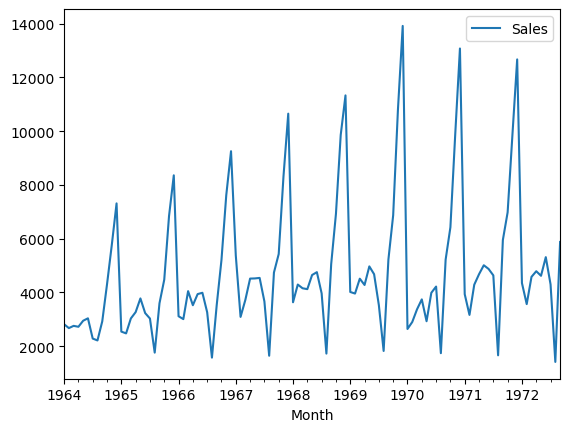

In [19]:
df.plot()

In [ ]:
#looking this graph,we can say this data is seasonal
#(seasonal is all about suppose in each yr in christmas sales goes up) and then down

In [22]:

!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 660.6 kB/s eta 0:00:14
     ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/9.2 MB 4.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.2 MB 3.8 MB/s eta 0:00:03
     ---- ----------------------------------- 1.0/9.2 MB 4.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.2/9.2 MB 5.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.2 MB 5.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.6/9.2 MB 4.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/9.2 MB 5.1 MB/s eta 0:00:02
     -------- ------------------------------- 2.0/9.2 MB 5.0 MB/s eta 0:00:02
     --------- ------------------------------ 2.3/9.2 MB 5.1 MB/s eta 0:00:02
     --------- ------------------------------ 2.3/9.2 MB 4.5 MB/s eta

In [23]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [24]:

test_result=adfuller(df['Sales'])

In [ ]:
###if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

In [25]:
#zip basically combines result,labels
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [66]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276204
p-value : 0.3639157716602462
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [27]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [28]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [30]:

df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [31]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [32]:
## Again test dickey fuller test on df['Sales First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

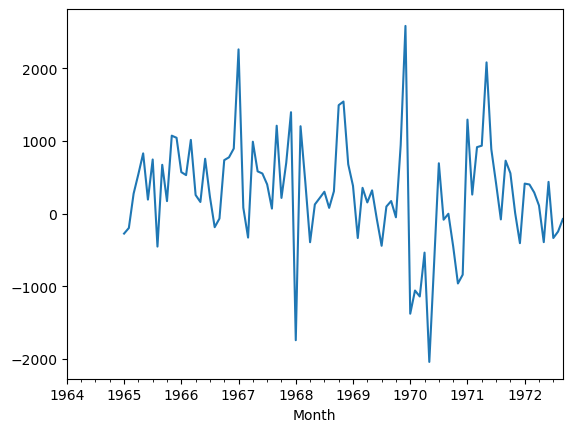

In [33]:
#now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationery graph
df['Seasonal First Difference'].plot()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

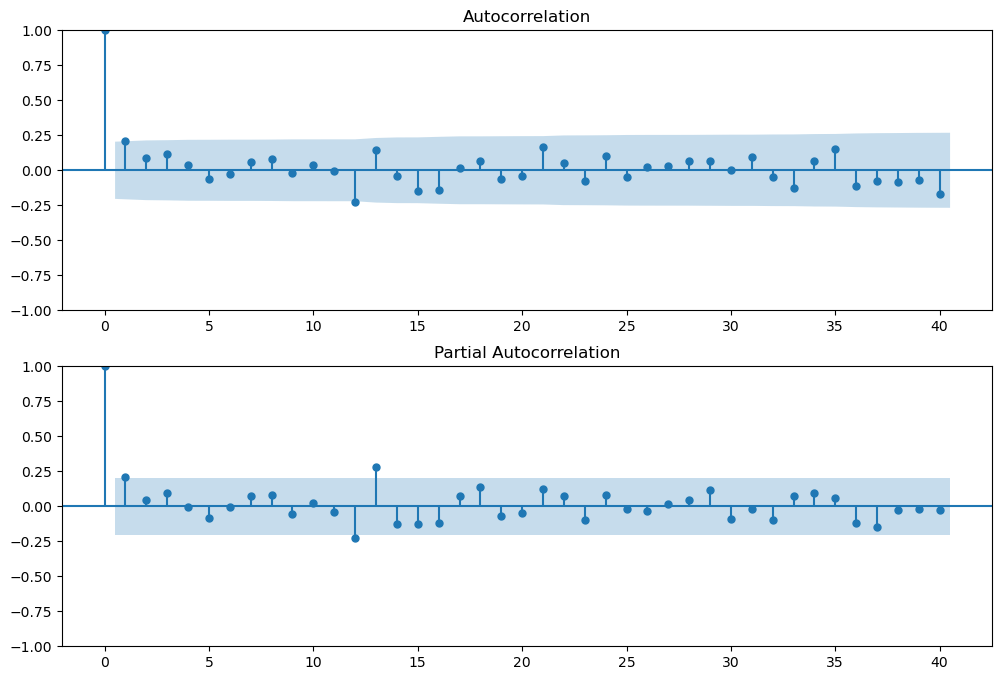

In [36]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
p, d, q = 1, 1, 1
model = ARIMA(df['Sales'], order=(p, d, q))
model_fit = model.fit()


C:\Users\shrev\Desktop\time_series\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shrev\Desktop\time_series\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shrev\Desktop\time_series\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 13 Oct 2023   AIC                           1911.627
Time:                        23:41:32   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.002      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.332      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

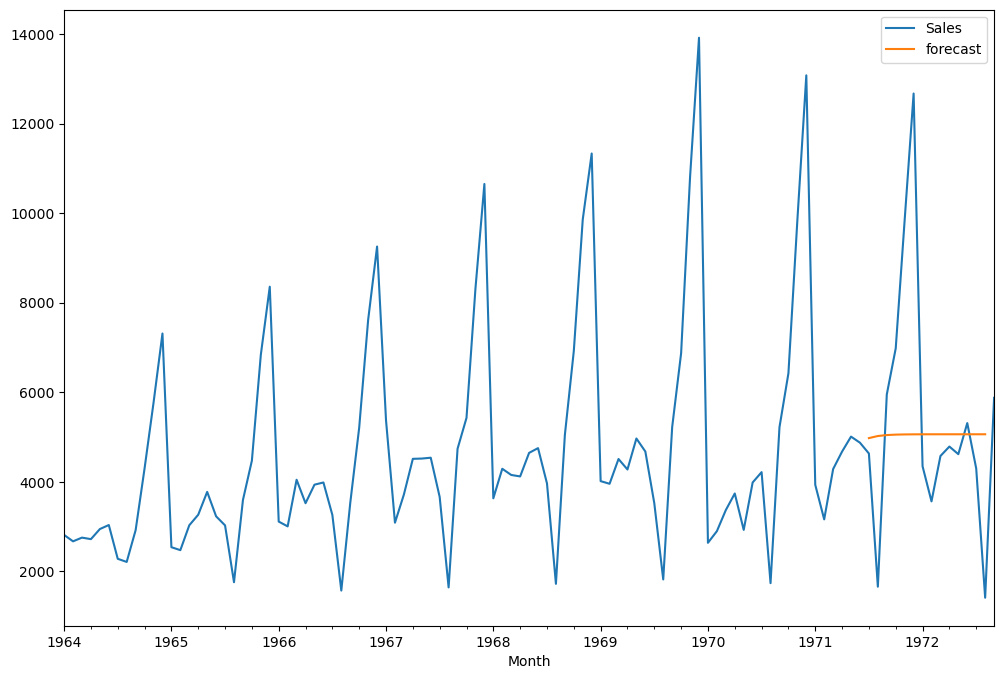

In [46]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [47]:
import statsmodels.api as sm

In [48]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\shrev\Desktop\time_series\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shrev\Desktop\time_series\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)


<Axes: xlabel='Month'>

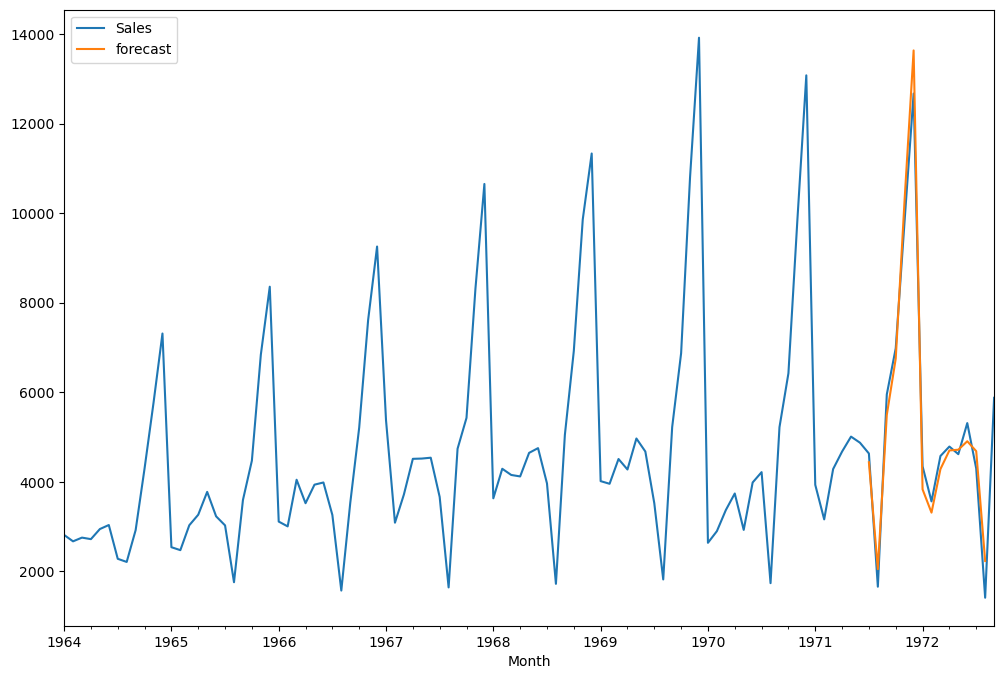

In [50]:
#blue line is original data anf orange is a forecasted data
df[['Sales','forecast']].plot(figsize=(12,8))

In [51]:
### to see how future predictions/projections looks like
from pandas.tseries.offsets import DateOffset

In [52]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [53]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [54]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [55]:
from pandas.tseries.offsets import DateOffset

#creating additional dataset for 24 months,
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [58]:
future_datset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [61]:
future_datset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [63]:
future_df=pd.concat([df,future_datset_df])

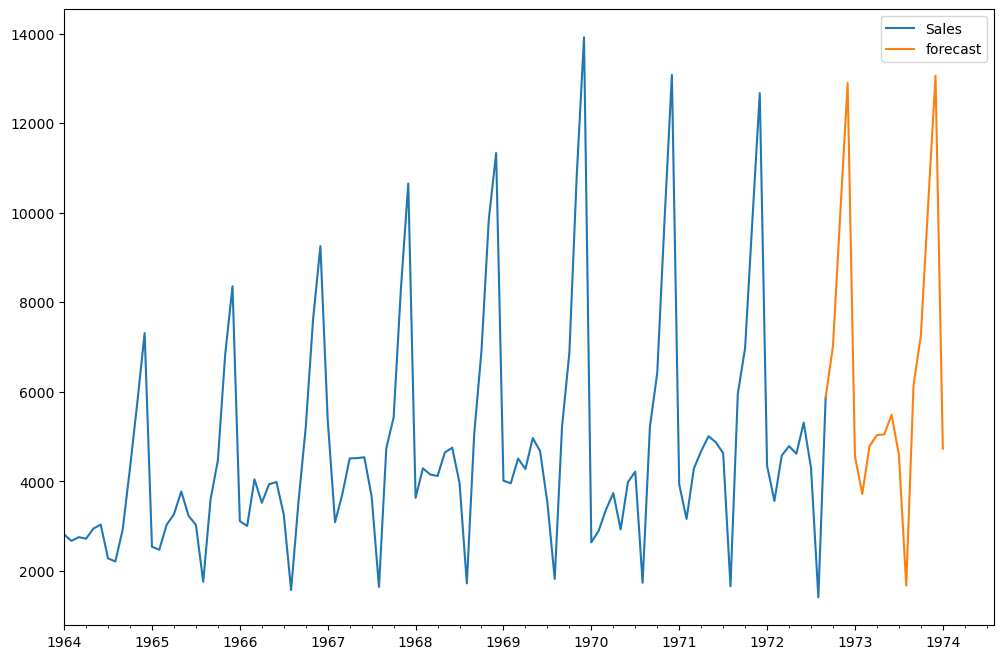

In [65]:
#then we can see future predictions
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) ;